# Workflow

In [1]:
%config Completer.use_jedi = False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from snippets import *
import snippets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
def update():
    global train_df, test_df
    init(train_df, test_df)

update()

In [4]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
target = 'trip_duration'
snippets.target = target

In [6]:
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
test_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
drop_column('id')

In [9]:
col_gen = (col for col in test_df.columns.to_list())

def next_col():
    global curr_col
    curr_col = next(col_gen)
    snippets.curr_col = curr_col
    return curr_col

In [10]:
next_col()

'vendor_id'

vendor_id - a code indicating the provider associated with the trip record

In [11]:
describe()

Column: vendor_id
Train dataset uniques: [2 1]
Test dataset uniques: [1 2]
Train has NaNs: 0
Test has NaNs: 0


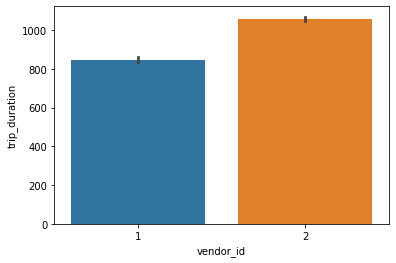

In [12]:
sns.barplot(
    x=curr_col,
    y=target,
    data=train_df
)

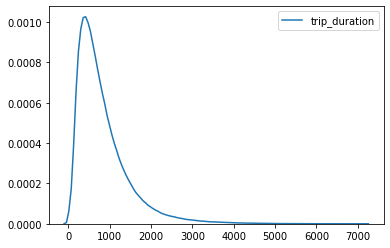

In [13]:
mask = train_df[target] < 2*60**2
sns.kdeplot(train_df[mask & train_df[curr_col] == 1][target])
sns.kdeplot(train_df[mask & train_df[curr_col] == 2][target])

In [14]:
le_column()

In [15]:
next_col()

'pickup_datetime'

Anything here can affect target -- day of week, national/city celebration day, hour of the day etc.

In [16]:
def to_datetime():
    global train_df, test_df
    global curr_col
    
    for df in train_df, test_df:
        df[curr_col] = pd.to_datetime(df[curr_col])
        
to_datetime()

In [17]:
train_df[curr_col]

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [18]:
train_df.set_index(curr_col, inplace=True)

In [19]:
uniques = train_df[target].unique()
top10_indexes = uniques.argsort()[-50:][::-1]
uniques[top10_indexes]

array([3526282, 2227612, 2049578, 1939736,   86392,   86391,   86390,
         86387,   86385,   86379,   86378,   86377,   86369,   86367,
         86366,   86365,   86364,   86363,   86362,   86361,   86360,
         86358,   86357,   86356,   86355,   86354,   86353,   86352,
         86351,   86350,   86349,   86348,   86347,   86346,   86345,
         86344,   86343,   86342,   86341,   86340,   86339,   86338,
         86337,   86336,   86335,   86334,   86333,   86332,   86331,
         86330])

In [20]:
86392 / 60**2

23.997777777777777

24 hour trips?...

In [21]:
train_df.shape

(1458644, 9)

In [22]:
train_df[train_df[target] > 23*60**2][target]

pickup_datetime
2016-02-20 04:03:06    84594
2016-05-07 18:36:22    86149
2016-06-07 12:58:48    86352
2016-02-13 00:21:49    86236
2016-03-18 11:54:20    85197
                       ...  
2016-06-23 16:04:53    86200
2016-02-08 19:11:31    86233
2016-06-08 16:29:12    85311
2016-02-02 11:31:10    86314
2016-04-24 00:58:34    86262
Name: trip_duration, Length: 1843, dtype: int64

In [23]:
train_df[train_df[target] > 24*60**2][target]

pickup_datetime
2016-01-05 00:19:42    1939736
2016-02-13 22:38:00    2049578
2016-01-05 06:14:15    2227612
2016-02-13 22:46:52    3526282
Name: trip_duration, dtype: int64

In [24]:
train_df = train_df[train_df[target] <= 24*60**2]
update()

In [25]:
train_df

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
pickup_datetime,,,,,,,,,
2016-03-14 17:24:55,1,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
2016-06-12 00:43:35,0,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2016-01-19 11:35:24,1,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
2016-04-06 19:32:31,1,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
2016-03-26 13:30:55,1,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...
2016-04-08 13:31:04,1,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
2016-01-10 07:35:15,0,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
2016-04-22 06:57:41,1,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764


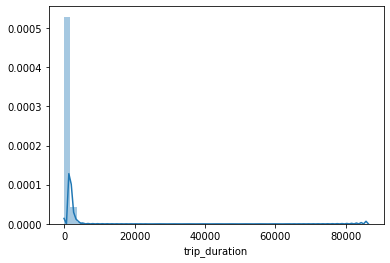

In [26]:
sns.distplot(train_df[target])

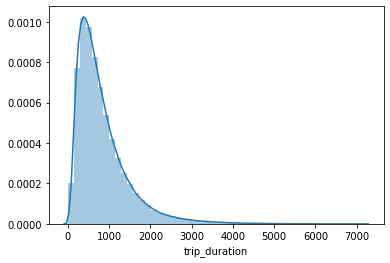

In [27]:
sns.distplot(
    train_df[train_df[target] <= 2*60**2][target]
)

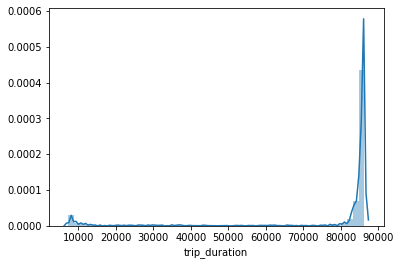

In [28]:
sns.distplot(
    train_df[train_df[target] > 2*60**2][target]
)

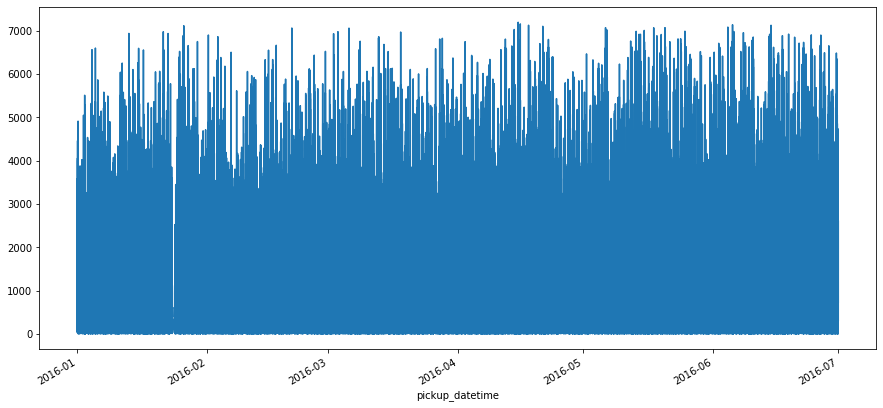

In [29]:
train_df[train_df[target] <= 2*60**2][target].plot(figsize=(15,7))

In [30]:
import datetime

datetime.datetime(1999, 12, 6)

datetime.datetime(1999, 12, 6, 0, 0)

In [31]:
import datetime

def datetime_extract():
    global train_df, test_df
    global curr_col
    
    for df in train_df, test_df:
        df[curr_col + '_year'] = df[curr_col].apply(lambda x: x.year)
        df[curr_col + '_month'] = df[curr_col].apply(lambda x: x.month)
        df[curr_col + '_day'] = df[curr_col].apply(lambda x: x.day)
        df[curr_col + '_hour'] = df[curr_col].apply(lambda x: x.hour)
        df[curr_col + '_day_of_week'] = df[curr_col].apply(lambda x: x.weekday())
        df[curr_col + '_is_weekend'] = df[curr_col + '_day_of_week'] > 4
        df[curr_col + '_day_of_year'] = df[curr_col].apply(
            lambda x: (x - datetime.datetime(x.year, 1, 1)).days + 1
        )

In [32]:
train_df.reset_index(inplace=True)

In [33]:
datetime_extract()

In [34]:
train_df.iloc[:, -7:]

,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_day_of_week,pickup_datetime_is_weekend,pickup_datetime_day_of_year
0,2016,3,14,17,0,False,74
1,2016,6,12,0,6,True,164
2,2016,1,19,11,1,False,19
3,2016,4,6,19,2,False,97
4,2016,3,26,13,5,True,86
...,...,...,...,...,...,...,...
1458635,2016,4,8,13,4,False,99
1458636,2016,1,10,7,6,True,10
1458637,2016,4,22,6,4,False,113
1458638,2016,1,5,15,1,False,5


In [35]:
describe('pickup_datetime_year')

Column: pickup_datetime_year
Train dataset uniques: [2016]
Test dataset uniques: [2016]
Train has NaNs: 0
Test has NaNs: 0


In [36]:
drop_column('pickup_datetime_year')

In [37]:
train_df.iloc[:, -7:]

,trip_duration,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_day_of_week,pickup_datetime_is_weekend,pickup_datetime_day_of_year
0,455,3,14,17,0,False,74
1,663,6,12,0,6,True,164
2,2124,1,19,11,1,False,19
3,429,4,6,19,2,False,97
4,435,3,26,13,5,True,86
...,...,...,...,...,...,...,...
1458635,778,4,8,13,4,False,99
1458636,655,1,10,7,6,True,10
1458637,764,4,22,6,4,False,113
1458638,373,1,5,15,1,False,5


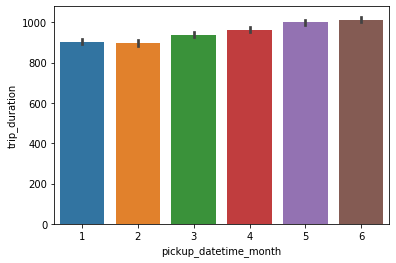

In [38]:
sns.barplot(
    x='pickup_datetime_month',
    y=target,
    data=train_df
)

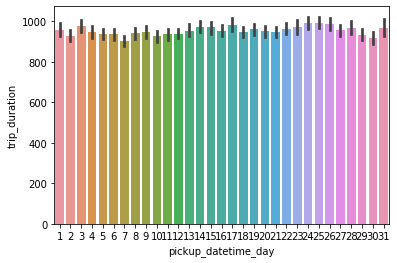

In [39]:
sns.barplot(
    x='pickup_datetime_day',
    y=target,
    data=train_df
)

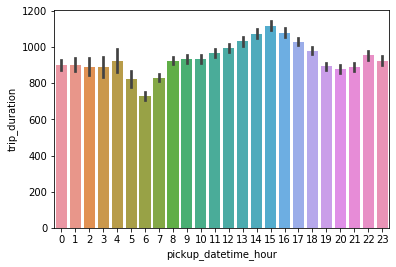

In [40]:
sns.barplot(
    x='pickup_datetime_hour',
    y=target,
    data=train_df
)

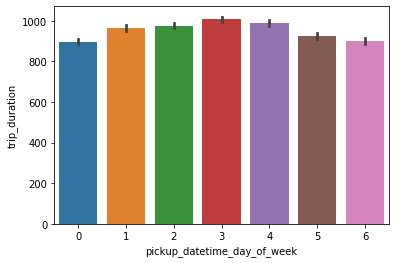

In [41]:
sns.barplot(
    x='pickup_datetime_day_of_week',
    y=target,
    data=train_df
)

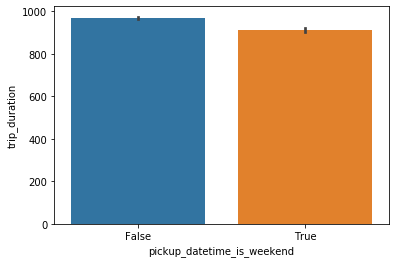

In [42]:
sns.barplot(
    x='pickup_datetime_is_weekend',
    y=target,
    data=train_df
)

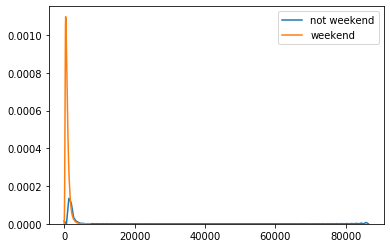

In [43]:
mask = train_df[target] < 2*60**2
sns.kdeplot(train_df[mask & train_df['pickup_datetime_is_weekend'] == False][target])
sns.kdeplot(train_df[mask & train_df['pickup_datetime_is_weekend'] == True][target])
plt.legend(['not weekend', 'weekend'])

Seems like all 24 hour trips happend in non-weekend days.

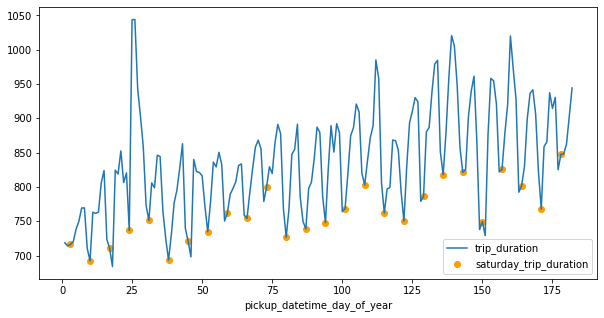

In [44]:
mask = train_df[target] < 2*60**2

df = (
    train_df[mask][['pickup_datetime_day_of_year', target]]
    .groupby('pickup_datetime_day_of_year')
    .mean()
)

mask1 = train_df[target] < 2*60**2
mask1 &= train_df['pickup_datetime_day_of_week'] == 6


df1 = (
    train_df[mask1][['pickup_datetime_day_of_year', target]]
    .groupby('pickup_datetime_day_of_year')
    .mean()
)

df.plot(figsize=(10, 5))
plt.scatter(
    df1.index,
    df1[target],
    c='#ff9d00'
)

plt.legend(['trip_duration', 'saturday_trip_duration'])
plt.show()

We see that the frequency is due to the days of the week. 

Combining day of week with month number we get pretty good predictor.

In [45]:
drop_column('pickup_datetime_day_of_year')

In [46]:
train_df, test_df = ohe_column('pickup_datetime_month')
update()
train_df, test_df = ohe_column('pickup_datetime_day_of_week')
update()

In [47]:
train_df

,pickup_datetime_day_of_week_0,pickup_datetime_day_of_week_1,pickup_datetime_day_of_week_2,pickup_datetime_day_of_week_3,pickup_datetime_day_of_week_4,pickup_datetime_day_of_week_5,pickup_datetime_day_of_week_6,pickup_datetime_month_1,pickup_datetime_month_2,pickup_datetime_month_3,...,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_is_weekend
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,17,False
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,0,True
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,11,False
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,19,False
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458635,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,-73.982201,40.745522,-73.994911,40.740170,N,778,8,13,False
1458636,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,-74.000946,40.747379,-73.970184,40.796547,N,655,10,7,True
1458637,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,-73.959129,40.768799,-74.004433,40.707371,N,764,22,6,False
1458638,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5,15,False


In [48]:
next_col()

'passenger_count'

In [49]:
describe()

Column: passenger_count
Train dataset uniques: [1 6 4 2 3 5 0 7 9 8]
Test dataset uniques: [1 2 4 5 3 6 0 9]
Train has NaNs: 0
Test has NaNs: 0


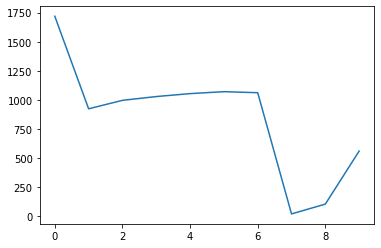

In [50]:
df = train_df[[curr_col, target]].groupby(curr_col).mean()

plt.plot(
    df.index,
    df[target]
)
plt.show()

In [51]:
train_df[curr_col].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [52]:
test_df[curr_col].value_counts()

1    443447
2     90027
5     33411
3     25686
6     20521
4     12017
0        23
9         2
Name: passenger_count, dtype: int64

0 and 7-9 are outliers. If I drop them, I will get linear dependence.

In [53]:
train_df = train_df[(train_df[curr_col] != 0) & (train_df[curr_col] < 7)]
test_df[curr_col] = test_df[curr_col].map(
    lambda x: x if 0 < x < 7 else train_df[curr_col].mode()
)

In [54]:
update()

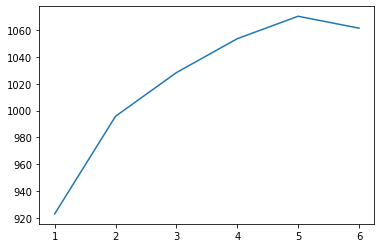

In [55]:
df = train_df[[curr_col, target]].groupby(curr_col).mean()

plt.plot(
    df.index,
    df[target]
)
plt.show()

Well, almost linear...

In [56]:
next_col()
describe()

Column: pickup_longitude
Train dataset uniques: [-73.98215485 -73.98041534 -73.97902679 ... -73.84746552 -73.89477539
 -73.84131622]
Test dataset uniques: [-73.98812866 -73.96420288 -73.99743652 ... -73.87021637 -73.87776947
 -73.90257263]
Train has NaNs: 0
Test has NaNs: 0


In [57]:
test_df.columns

Index(['pickup_datetime_day_of_week_0', 'pickup_datetime_day_of_week_1',
       'pickup_datetime_day_of_week_2', 'pickup_datetime_day_of_week_3',
       'pickup_datetime_day_of_week_4', 'pickup_datetime_day_of_week_5',
       'pickup_datetime_day_of_week_6', 'pickup_datetime_month_1',
       'pickup_datetime_month_2', 'pickup_datetime_month_3',
       'pickup_datetime_month_4', 'pickup_datetime_month_5',
       'pickup_datetime_month_6', 'vendor_id', 'pickup_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_datetime_day', 'pickup_datetime_hour',
       'pickup_datetime_is_weekend'],
      dtype='object')

I think I should somehow define a real path length via Google Maps or something to gain extra data but It sounds like cheating. To think of that I also could get extra data about traffic in certain days and hours... 

Even if it is implied by organizer ("We are encouraging you (with cash prizes!) to publish additional training data that other participants can use for their predictions.") I won't do it because It is a big overhead for a simple lab work.

I will just add 3 simple features: sum of longitude and latitude path lengths, direct path length and area of "rounded square" (since our planet is spheroid).

In [58]:
train_df.shape

(1458575, 26)

In [59]:
train_df[[
    'pickup_longitude', 
    'pickup_latitude', 
    'dropoff_longitude', 
    'dropoff_latitude'
]].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.458575e+06,1.458575e+06,1.458575e+06,1.458575e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01
std,7.090100e-02,3.287998e-02,7.064260e-02,3.588953e-02
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01
75%,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01


Longitude and latitude should be in [-90; 90] and [-180, 180] ranges respectively.

Mean position corresponds to NY but longitude and latitude are confused (checked with wiki and google maps). 

In [60]:
for df in train_df, test_df:
    for prefix in 'pickup_', 'dropoff_':
        tmp = df[prefix + 'longitude'].copy()
        df[prefix + 'longitude'] = df[prefix + 'latitude']
        df[prefix + 'latitude'] = tmp

/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [61]:
train_df[[
    'pickup_longitude', 
    'pickup_latitude', 
    'dropoff_longitude', 
    'dropoff_latitude'
]].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.458575e+06,1.458575e+06,1.458575e+06,1.458575e+06
mean,4.075092e+01,-7.397349e+01,4.075180e+01,-7.397342e+01
std,3.287998e-02,7.090100e-02,3.588953e-02,7.064260e-02
min,3.435970e+01,-1.219333e+02,3.218114e+01,-1.219333e+02
25%,4.073735e+01,-7.399187e+01,4.073589e+01,-7.399133e+01
50%,4.075410e+01,-7.398174e+01,4.075452e+01,-7.397975e+01
75%,4.076836e+01,-7.396733e+01,4.076981e+01,-7.396302e+01
max,5.188108e+01,-6.133553e+01,4.392103e+01,-6.133553e+01


Okey, now I need to transform geographic coordinate system to spherical coordinate system.

Let $\hat\theta$ be longitude and $\hat\phi$ be latitude.

$\hat\theta = -\theta + \frac{\pi}{2} \Rightarrow \theta = -\hat\theta + \frac{\pi}{2}$

$\hat\phi = \phi - \pi \Rightarrow \phi = \hat\phi + \pi$

In [62]:
for df in train_df, test_df:
    for prefix in 'pickup_', 'dropoff_':
        df[prefix + 'longitude'] = -df[prefix + 'longitude'] + 90
        df[prefix + 'latitude'] = df[prefix + 'latitude'] + 180

/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
# to radians

position_columns = [
    'pickup_longitude', 
    'pickup_latitude', 
    'dropoff_longitude', 
    'dropoff_latitude'
]

for df in train_df, test_df:
    for column in position_columns:
        df.loc[:, column] = df[column].apply(
            lambda x: np.radians(x)
        )

/home/a3nippo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
from math import cos

radius = 6371  # earth mean radius

for df in train_df, test_df:
    d_phi = df['dropoff_latitude'] - df['pickup_latitude']
    
    df['area'] = radius**2 * d_phi * (
        df['pickup_longitude'].apply(lambda x: cos(x))
        -df['dropoff_longitude'].apply(lambda x: cos(x))
    )
    
    # I need to apply abs
    # because I don't follow
    # that dropoff_value > pickup_value
    df['area'] = df['area'].apply(abs)

/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [83]:
from math import sin, cos, sqrt

def dist(longitude0, longitude1, latitude0, latitude1):    
    radius = 6371  # earth mean radius
    
    to_sqrt = 2 * radius**2 * (
        1 - (
            longitude0.apply(sin)
            *longitude1.apply(sin)
            *(latitude0 - latitude1).apply(cos)
        ) - (
            longitude0.apply(cos)
            *longitude1.apply(cos)
        )
    )
    
    # negative values can be obtained
    # due to precision errors
    return to_sqrt.apply(abs).apply(sqrt)

In [92]:
zeros = pd.Series(
    0,
    index = df.index
)

for df in train_df, test_df:
    df['lengths_sum'] = dist(
        df['pickup_longitude'],
        df['dropoff_longitude'],
        df['pickup_latitude'],
        df['pickup_latitude'],
    ) + dist(
        df['pickup_longitude'],
        df['pickup_longitude'],
        df['pickup_latitude'],
        df['dropoff_latitude']
    )
    
    df['dist'] = dist(
        df['pickup_longitude'],
        df['dropoff_longitude'],
        df['pickup_latitude'],
        df['dropoff_latitude']
    )

/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/a3nippo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [102]:
train_df.iloc[:, -3:]

,area,lengths_sum,dist
0,0.383127,1.735433,1.498521
1,1.323969,2.430506,1.805507
2,13.271941,8.203575,6.385098
3,0.276689,1.661331,1.485498
4,0.012978,1.199456,1.188588
...,...,...,...
1458635,0.637264,1.665895,1.225080
1458636,14.162379,8.058580,6.049835
1458637,26.071424,10.645645,7.824605
1458638,0.561108,1.521850,1.092564


In [99]:
test_df.columns

Index(['pickup_datetime_day_of_week_0', 'pickup_datetime_day_of_week_1',
       'pickup_datetime_day_of_week_2', 'pickup_datetime_day_of_week_3',
       'pickup_datetime_day_of_week_4', 'pickup_datetime_day_of_week_5',
       'pickup_datetime_day_of_week_6', 'pickup_datetime_month_1',
       'pickup_datetime_month_2', 'pickup_datetime_month_3',
       'pickup_datetime_month_4', 'pickup_datetime_month_5',
       'pickup_datetime_month_6', 'vendor_id', 'pickup_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_datetime_day', 'pickup_datetime_hour',
       'pickup_datetime_is_weekend', 'area', 'lengths_sum', 'dist'],
      dtype='object')

In [100]:
while curr_col != 'store_and_fwd_flag':
    next_col()

In [101]:
curr_col

'store_and_fwd_flag'

In [103]:
describe()

Column: store_and_fwd_flag
Train dataset uniques: ['N' 'Y']
Test dataset uniques: ['N' 'Y']
Train has NaNs: 0
Test has NaNs: 0


In [104]:
update()
le_column()

/home/a3nippo/Progs/sem_6/ML/lab01/nyc-taxi-trip-duration/snippets.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column] = le.fit_transform(train_df[column])


In [106]:
describe()

Column: store_and_fwd_flag
Train dataset uniques: [0 1]
Test dataset uniques: [0 1]
Train has NaNs: 0
Test has NaNs: 0


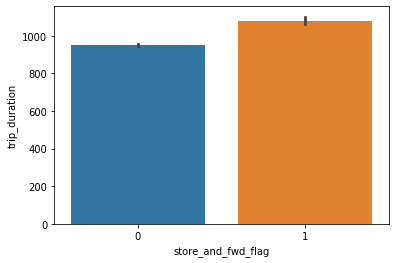

In [111]:
sns.barplot(
    x=curr_col,
    y=target,
    data=train_df
)

In [113]:
train_df[['vendor_id', curr_col]].corr()

,vendor_id,store_and_fwd_flag
vendor_id,1.00000,-0.07986
store_and_fwd_flag,-0.07986,1.00000


In [114]:
next_col()
describe()

StopIteration: 

In [117]:
train_df.drop('dropoff_datetime', axis=1, inplace=True)

/home/a3nippo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [119]:
train_df.columns

Index(['pickup_datetime_day_of_week_0', 'pickup_datetime_day_of_week_1',
       'pickup_datetime_day_of_week_2', 'pickup_datetime_day_of_week_3',
       'pickup_datetime_day_of_week_4', 'pickup_datetime_day_of_week_5',
       'pickup_datetime_day_of_week_6', 'pickup_datetime_month_1',
       'pickup_datetime_month_2', 'pickup_datetime_month_3',
       'pickup_datetime_month_4', 'pickup_datetime_month_5',
       'pickup_datetime_month_6', 'pickup_datetime', 'vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_datetime_day', 'pickup_datetime_hour',
       'pickup_datetime_is_weekend', 'area', 'lengths_sum', 'dist'],
      dtype='object')

In [131]:
update()
drop_column('pickup_datetime')

/home/a3nippo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Feature importances

In [138]:
train_df.to_csv('cleaned_train.csv', index=False)
test_df.to_csv('cleaned_test.csv', index=False)

In [161]:
train_df = pd.read_csv('cleaned_train.csv')

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target = 'trip_duration'

X = train_df.drop(target, axis=1)
X = StandardScaler().fit_transform(X)
y = train_df[[target]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [174]:
np.abs(predictions_ridge)

array([[ 728.94042895],
       [ 768.09142304],
       [ 627.23779252],
       ...,
       [ 901.4063199 ],
       [1454.81046612],
       [ 774.30619375]])

In [175]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error

model_ridge = Ridge()
model_dtr = DTR(min_samples_leaf=500)

model_ridge.fit(X_train, y_train)
model_dtr.fit(X_train, y_train)

predictions_ridge = model_ridge.predict(X_test)
predictions_ridge = np.abs(predictions_ridge)  # just to get score...

predictions_dtr = model_dtr.predict(X_test)

score_ridge = np.sqrt(mean_squared_log_error(
    y_test,
    predictions_ridge
))

score_dtr = np.sqrt(mean_squared_log_error(
    y_test, 
    predictions_dtr
))

In [185]:
model_ridge.coef_.ravel()

array([ -26.68972997,    6.6253351 ,    9.7492935 ,   16.059733  ,
         11.01311071,    2.49805315,  -21.6661016 ,  -19.18974498,
        -12.25270705,   -7.37764845,    4.24634749,   14.06578041,
         20.24668684,  106.93569195,   10.06965298,   45.34458381,
          6.52869919,   21.25054501,   -9.74470493,    3.67488711,
          5.02995524,   22.63178775,  -14.35759421, -173.19351379,
        148.26372337,  386.08861066])

Ridge
Score: 0.665201


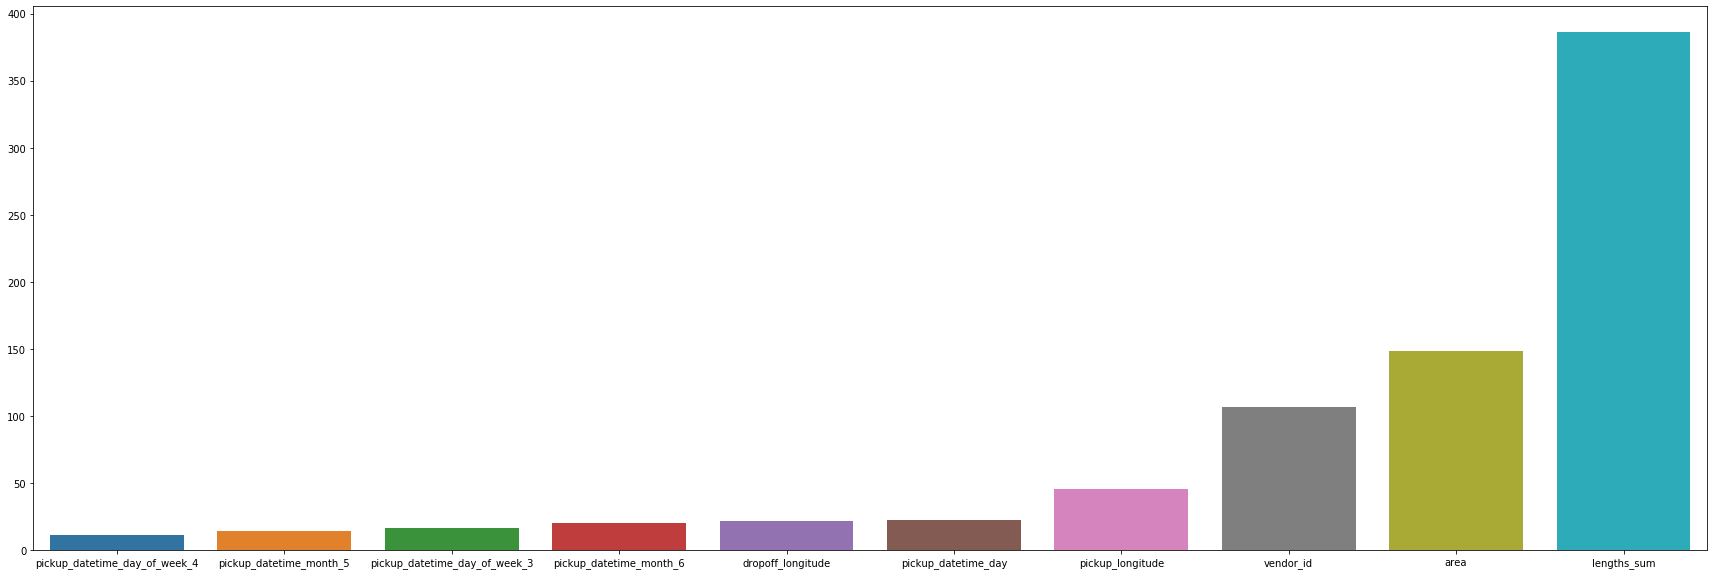

In [186]:
result_importances = model_ridge.coef_.ravel()

top10 = result_importances.argsort()[-10:]

f, ax = plt.subplots(1, 1, figsize=(30, 10))

print('Ridge')
print("Score: %f" % score_ridge)

sns.barplot(
    train_df.columns[top10], 
    result_importances[top10], 
    ax=ax,
    order=train_df.columns[top10]
)

DecisionTree
Score: 0.579538


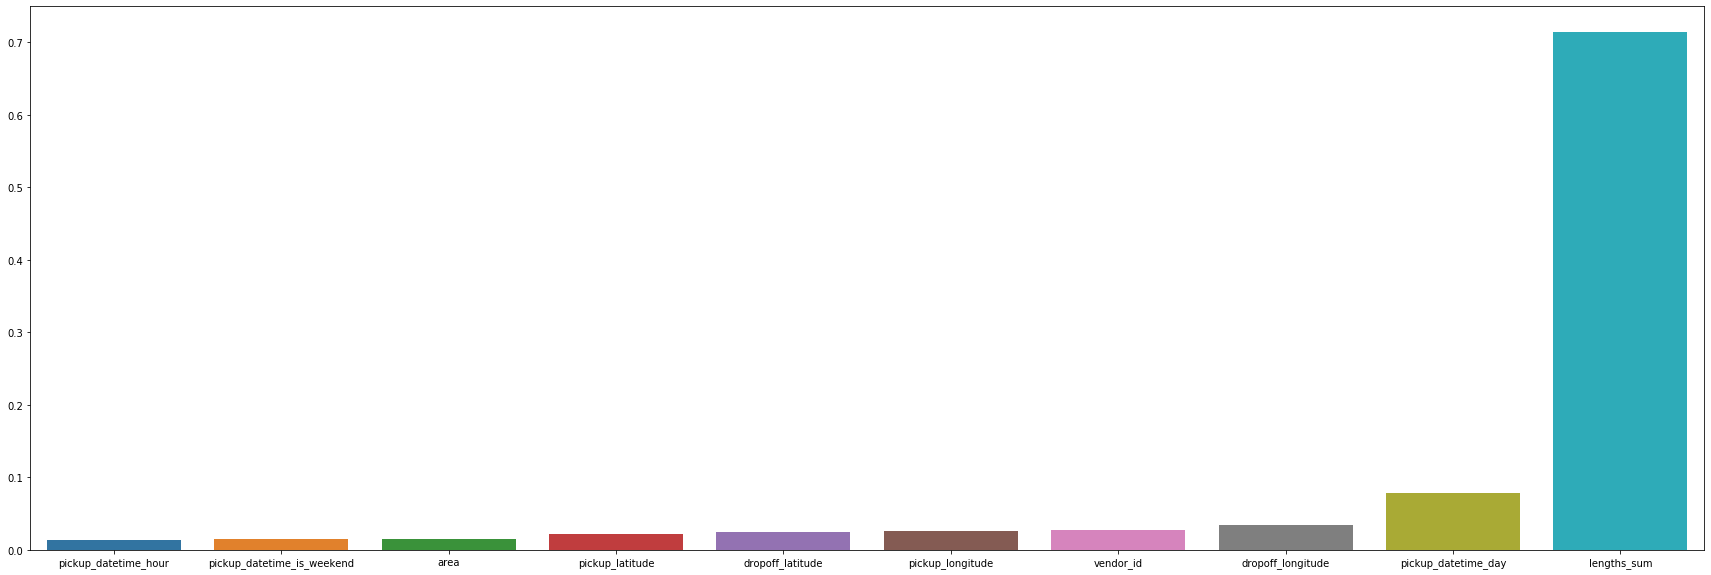

In [180]:
result_importances = model_dtr.feature_importances_

top10 = result_importances.argsort()[-10:]

f, ax = plt.subplots(1, 1, figsize=(30, 10))

print('DecisionTree')
print("Score: %f" % score_dtr)

sns.barplot(
    train_df.columns[top10], 
    result_importances[top10], 
    ax=ax,
    order=train_df.columns[top10]
)